# Análisis de complejidad de ganar_siempre

A continuación se realizará un análisis por el método de cuadrados mínimos para verificar que la función ganar_siempre efectivamente es O(n).

Esta función toma como parámetro un arreglo de n números (que representan monedas), por lo que podemos crear arreglos de distinto tamaño para corroborar empíricamente que la complejidad es O(n).

Correremos estas simulaciones para obtener los tiempos de ejecución de la función para distintas entradas, y luego haremos un ajuste por cuadrados mínimos para ver si nos alejamos de una tendencia lineal. Si el error es bajo, significa que la función es de complejidad lineal.

## Imports

In [48]:
# Importamos la función a testear
from main import ganar_siempre

# Imports necesarios para el notebook:

# Seed de aleatoriedad
from random import seed

# Matplotlib y Seaborn para graficar, numpy y scipy para cálculos
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

# Importamos la función para calcular los tiempos de ejecución
from analisis_complejidad_util import time_algorithm

# Siempre seteamos la seed de aleatoriedad para que los # resultados sean reproducibles
seed(237)
np.random.seed(237)

sns.set_theme()

## Dataset de prueba

Generaremos un dataset variado para probar a nuestra función. 

In [49]:
# Función para obtener un array de largo n con elementos random entre 0 y 1000
def get_random_array(size: int):
    return np.random.randint(0, 1000, size)

# La variable x van a ser los valores del eje x de los gráficos en todo el notebook
# Tamaño mínimo=100, tamaño máximo=10kk, cantidad de puntos=20
# Representa los tamaños de la entrada, es decir el largo de los arrays de monedas
x = np.linspace(100, 10_000_000, 20).astype(int)

# Usamos la función time_algorithm de utils que prueba la función para las distintas entradas
# Devuelve el tiempo que tarda para cada tamaño de entrada
results = time_algorithm(ganar_siempre, x, lambda s: [get_random_array(s)])

## Gráfico de tiempo en función de la entrada

Graficamos el tiempo de ejecución de ganar_siempre en función al tamaño de la entrada que probamos anteriormente. Podemos ver que para 500000 elementos tarda aproximadamente 1,2 segundos, y que para 1000000 de elementos tarda aproximadamente 2.5 segundos, lo que nos estaría indicando que el algoritmo es lineal.

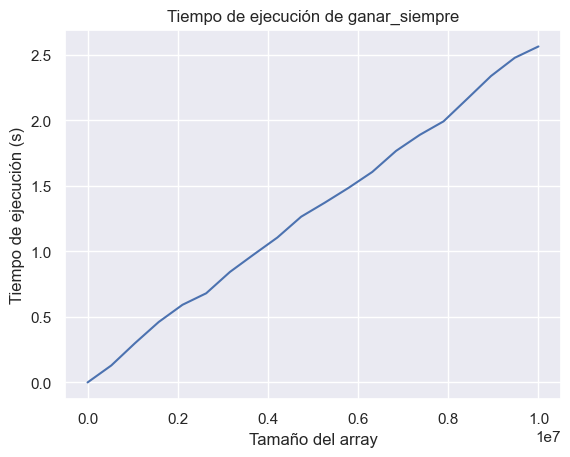

In [50]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución de ganar_siempre')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
None

## Ajuste por cuadrados mínimos

Ahora vamos a ajustar por cuadrados mínimos a los resultados que obtenimos de los tiempos de ejecución de nuestra función. En nuestro caso vamos a ajustar contra la siguiente recta:
$$
y = c_1 x + c_2
$$

Podemos ver que el error es bajo, por lo que ajusta muy bien a la recta.

In [54]:
# Ajuste para la complejidad O(n)
f = lambda x, c1, c2: c1 * x + c2 

# Función de scipy que ajusta a la curva f que le pasamos como parámetro
c, pcov = sp.optimize.curve_fit(f, x, [results[n] for n in x])

# Mostramos los resultados del ajuste
print(f"Valores de la pendiente y la ordenada al orígen: \n\tc_1 = {c[0]}, c_2 = {c[1]}")

# Obtenemos el error cuadrático total
r = np.sum((c[0] * x + c[1] - [results[n] for n in x])**2)
print(f"Error cuadrático total: \n\t{r}")

Valores de la pendiente y la ordenada al orígen: 
	c_1 = 2.5495991986148807e-07, c_2 = 0.025683563953890605
Error cuadrático total: 
	0.011200328799622086


## Gráfico de nuestros datos y el ajuste

Se observa que los datos ajustan muy bien contra la recta.

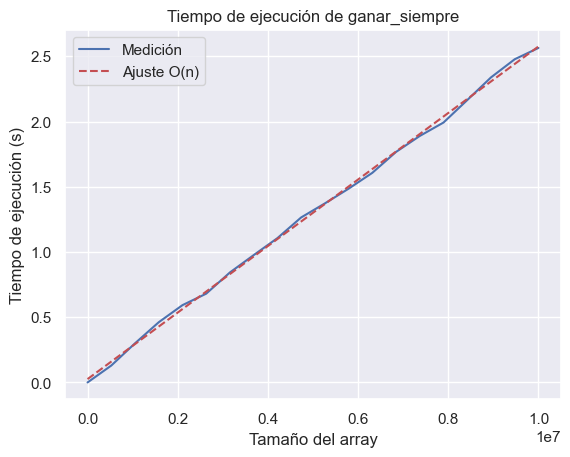

In [55]:
ax.plot(x, [c[0] * n + c[1] for n in x], 'r--', label="Ajuste O(n)")
ax.legend()
fig

## Error de ajuste en función del tamaño de la entrada

En este gráfico se observa que el error de ajuste según el tamaño de la entrada es muy bajo en todos los casos, y es parejo a lo largo de todos los tamaños. Esto es otro indicio de que el algoritmo es lineal.

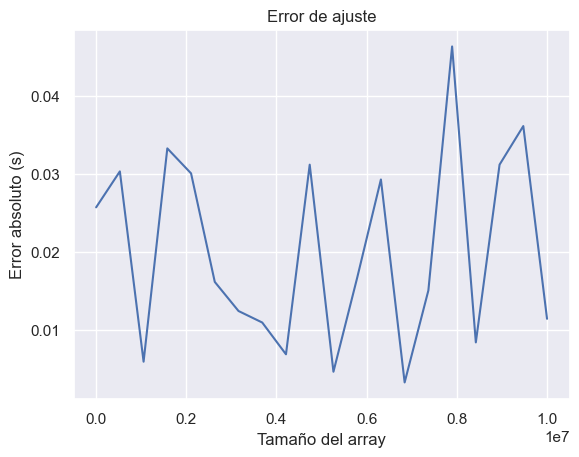

In [57]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c[0] * n + c[1] - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
None